In [48]:
import numpy as np

from engine import RMG, AdvRw
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent

In [55]:
N_EXP = 10

r0ss = []
r1ss = []

smooth = 100

for n in range(N_EXP):
    batch_size = 1
    max_steps = 1
    gamma = 0.  # only one steps!

    mode = 'adversary'
    env = AdvRw(mode, p=0.6)  # p is only used in neutral mode
    env.reset()

    possible_actions = [0, 1]  # Target A or B

    p = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #p = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)

    # Stateless interactions (agents do not have memory)
    s = 0

    n_iter = 1000 + smooth # because of the smoothening in the graphics

    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = p.act()

            # World changes
            _, (r0, _), done, _ = env.step(a0)

            # Agents learn

            p.update(s, (a0, None), (r0, None), s )

            #s = new_s  #stateless!

            r0s.append(r0)

        env.reset()
    
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

---
r -50
p [0.625 0.375]
---
---
r 50
p [0.46875 0.53125]
---
---
r -50
p [0.3515625 0.6484375]
---
---
r -50
p [0.26367188 0.73632812]
---
---
r 50
p [0.44775391 0.55224609]
---
---
r 50
p [0.58581543 0.41418457]
---
---
r -50
p [0.68936157 0.31063843]
---
---
r -50
p [0.76702118 0.23297882]
---
---
r -50
p [0.82526588 0.17473412]
---
---
r 50
p [0.61894941 0.38105059]
---
---
r 50
p [0.46421206 0.53578794]
---
---
r -50
p [0.34815904 0.65184096]
---
---
r -50
p [0.26111928 0.73888072]
---
---
r -50
p [0.19583946 0.80416054]
---
---
r 50
p [0.3968796 0.6031204]
---
---
r 50
p [0.5476597 0.4523403]
---
---
r -50
p [0.66074477 0.33925523]
---
---
r -50
p [0.74555858 0.25444142]
---
---
r -50
p [0.80916894 0.19083106]
---
---
r 50
p [0.6068767 0.3931233]
---
---
r 50
p [0.45515753 0.54484247]
---
---
r -50
p [0.34136814 0.65863186]
---
---
r -50
p [0.25602611 0.74397389]
---
---
r -50
p [0.19201958 0.80798042]
---
---
r 50
p [0.39401469 0.60598531]
---
---
r 50
p [0.54551101 0.45448899]

---
r 50
p [0.38153473 0.61846527]
---
---
r -50
p [0.28615105 0.71384895]
---
---
r -50
p [0.21461329 0.78538671]
---
---
r -50
p [0.16095997 0.83904003]
---
---
r -50
p [0.12071997 0.87928003]
---
---
r 50
p [0.34053998 0.65946002]
---
---
r 50
p [0.50540499 0.49459501]
---
---
r -50
p [0.62905374 0.37094626]
---
---
r -50
p [0.7217903 0.2782097]
---
---
r -50
p [0.79134273 0.20865727]
---
---
r 50
p [0.59350705 0.40649295]
---
---
r 50
p [0.44513028 0.55486972]
---
---
r -50
p [0.33384771 0.66615229]
---
---
r -50
p [0.25038579 0.74961421]
---
---
r -50
p [0.18778934 0.81221066]
---
---
r 50
p [0.390842 0.609158]
---
---
r 50
p [0.5431315 0.4568685]
---
---
r -50
p [0.65734863 0.34265137]
---
---
r -50
p [0.74301147 0.25698853]
---
---
r -50
p [0.8072586 0.1927414]
---
---
r 50
p [0.60544395 0.39455605]
---
---
r 50
p [0.45408296 0.54591704]
---
---
r -50
p [0.34056222 0.65943778]
---
---
r -50
p [0.25542167 0.74457833]
---
---
r -50
p [0.19156625 0.80843375]
---
---
r 50
p [0.39367

p [0.61050133 0.38949867]
---
---
r 50
p [0.457876 0.542124]
---
---
r -50
p [0.343407 0.656593]
---
---
r -50
p [0.25755525 0.74244475]
---
---
r 50
p [0.44316644 0.55683356]
---
---
r 50
p [0.58237483 0.41762517]
---
---
r -50
p [0.68678112 0.31321888]
---
---
r -50
p [0.76508584 0.23491416]
---
---
r 50
p [0.57381438 0.42618562]
---
---
r 50
p [0.43036079 0.56963921]
---
---
r -50
p [0.32277059 0.67722941]
---
---
r 50
p [0.49207794 0.50792206]
---
---
r -50
p [0.36905846 0.63094154]
---
---
r 50
p [0.52679384 0.47320616]
---
---
r -50
p [0.64509538 0.35490462]
---
---
r -50
p [0.73382154 0.26617846]
---
---
r 50
p [0.55036615 0.44963385]
---
---
r 50
p [0.41277461 0.58722539]
---
---
r -50
p [0.30958096 0.69041904]
---
---
r -50
p [0.23218572 0.76781428]
---
---
r -50
p [0.17413929 0.82586071]
---
---
r 50
p [0.38060447 0.61939553]
---
---
r 50
p [0.53545335 0.46454665]
---
---
r -50
p [0.65159001 0.34840999]
---
---
r 50
p [0.48869251 0.51130749]
---
---
r 50
p [0.61651938 0.38348

p [0.79855019 0.20144981]
---
---
r -50
p [0.84891264 0.15108736]
---
---
r 50
p [0.63668448 0.36331552]
---
---
r 50
p [0.47751336 0.52248664]
---
---
r 50
p [0.60813502 0.39186498]
---
---
r 50
p [0.45610126 0.54389874]
---
---
r -50
p [0.34207595 0.65792405]
---
---
r -50
p [0.25655696 0.74344304]
---
---
r -50
p [0.19241772 0.80758228]
---
---
r 50
p [0.39431329 0.60568671]
---
---
r -50
p [0.29573497 0.70426503]
---
---
r 50
p [0.47180123 0.52819877]
---
---
r -50
p [0.35385092 0.64614908]
---
---
r 50
p [0.51538819 0.48461181]
---
---
r -50
p [0.63654114 0.36345886]
---
---
r 50
p [0.47740586 0.52259414]
---
---
r 50
p [0.60805439 0.39194561]
---
---
r -50
p [0.70604079 0.29395921]
---
---
r -50
p [0.7795306 0.2204694]
---
---
r -50
p [0.83464795 0.16535205]
---
---
r -50
p [0.87598596 0.12401404]
---
---
r 50
p [0.65698947 0.34301053]
---
---
r 50
p [0.4927421 0.5072579]
---
---
r -50
p [0.36955658 0.63044342]
---
---
r -50
p [0.27716743 0.72283257]
---
---
r -50
p [0.20787557 0

p [0.28665206 0.71334794]
---
---
r -50
p [0.21498905 0.78501095]
---
---
r -50
p [0.16124178 0.83875822]
---
---
r -50
p [0.12093134 0.87906866]
---
---
r -50
p [0.0906985 0.9093015]
---
---
r 50
p [0.31802388 0.68197612]
---
---
r 50
p [0.48851791 0.51148209]
---
---
r 50
p [0.61638843 0.38361157]
---
---
r -50
p [0.71229132 0.28770868]
---
---
r -50
p [0.78421849 0.21578151]
---
---
r -50
p [0.83816387 0.16183613]
---
---
r -50
p [0.8786229 0.1213771]
---
---
r -50
p [0.90896718 0.09103282]
---
---
r 50
p [0.68172538 0.31827462]
---
---
r 50
p [0.51129404 0.48870596]
---
---
r 50
p [0.38347053 0.61652947]
---
---
r -50
p [0.2876029 0.7123971]
---
---
r -50
p [0.21570217 0.78429783]
---
---
r -50
p [0.16177663 0.83822337]
---
---
r -50
p [0.12133247 0.87866753]
---
---
r -50
p [0.09099935 0.90900065]
---
---
r 50
p [0.31824952 0.68175048]
---
---
r 50
p [0.48868714 0.51131286]
---
---
r 50
p [0.61651535 0.38348465]
---
---
r -50
p [0.71238651 0.28761349]
---
---
r -50
p [0.78428989 0

p [0.64801836 0.35198164]
---
---
r -50
p [0.73601377 0.26398623]
---
---
r 50
p [0.55201033 0.44798967]
---
---
r 50
p [0.41400774 0.58599226]
---
---
r -50
p [0.31050581 0.68949419]
---
---
r -50
p [0.23287936 0.76712064]
---
---
r -50
p [0.17465952 0.82534048]
---
---
r 50
p [0.38099464 0.61900536]
---
---
r 50
p [0.53574598 0.46425402]
---
---
r -50
p [0.65180948 0.34819052]
---
---
r -50
p [0.73885711 0.26114289]
---
---
r -50
p [0.80414283 0.19585717]
---
---
r 50
p [0.60310713 0.39689287]
---
---
r 50
p [0.45233034 0.54766966]
---
---
r -50
p [0.33924776 0.66075224]
---
---
r -50
p [0.25443582 0.74556418]
---
---
r -50
p [0.19082686 0.80917314]
---
---
r 50
p [0.39312015 0.60687985]
---
---
r 50
p [0.54484011 0.45515989]
---
---
r -50
p [0.65863008 0.34136992]
---
---
r -50
p [0.74397256 0.25602744]
---
---
r -50
p [0.80797942 0.19202058]
---
---
r 50
p [0.60598457 0.39401543]
---
---
r 50
p [0.45448842 0.54551158]
---
---
r -50
p [0.34086632 0.65913368]
---
---
r -50
p [0.25564

p [0.54538491 0.45461509]
---
---
r -50
p [0.65903868 0.34096132]
---
---
r -50
p [0.74427901 0.25572099]
---
---
r -50
p [0.80820926 0.19179074]
---
---
r 50
p [0.60615694 0.39384306]
---
---
r 50
p [0.45461771 0.54538229]
---
---
r -50
p [0.34096328 0.65903672]
---
---
r -50
p [0.25572246 0.74427754]
---
---
r -50
p [0.19179185 0.80820815]
---
---
r 50
p [0.39384388 0.60615612]
---
---
r 50
p [0.54538291 0.45461709]
---
---
r -50
p [0.65903718 0.34096282]
---
---
r -50
p [0.74427789 0.25572211]
---
---
r -50
p [0.80820842 0.19179158]
---
---
r 50
p [0.60615631 0.39384369]
---
---
r 50
p [0.45461723 0.54538277]
---
---
r -50
p [0.34096293 0.65903707]
---
---
r -50
p [0.25572219 0.74427781]
---
---
r -50
p [0.19179165 0.80820835]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.5453828 0.4546172]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427783 0.25572217]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615628 0.39384372]
---
---
r 50
p [0.45461721 

r -50
p [0.73167518 0.26832482]
---
---
r -50
p [0.79875638 0.20124362]
---
---
r 50
p [0.59906729 0.40093271]
---
---
r 50
p [0.44930047 0.55069953]
---
---
r -50
p [0.33697535 0.66302465]
---
---
r -50
p [0.25273151 0.74726849]
---
---
r -50
p [0.18954863 0.81045137]
---
---
r 50
p [0.39216148 0.60783852]
---
---
r 50
p [0.54412111 0.45587889]
---
---
r -50
p [0.65809083 0.34190917]
---
---
r -50
p [0.74356812 0.25643188]
---
---
r -50
p [0.80767609 0.19232391]
---
---
r -50
p [0.85575707 0.14424293]
---
---
r 50
p [0.6418178 0.3581822]
---
---
r 50
p [0.48136335 0.51863665]
---
---
r -50
p [0.36102251 0.63897749]
---
---
r -50
p [0.27076689 0.72923311]
---
---
r -50
p [0.20307516 0.79692484]
---
---
r -50
p [0.15230637 0.84769363]
---
---
r 50
p [0.36422978 0.63577022]
---
---
r 50
p [0.52317233 0.47682767]
---
---
r -50
p [0.64237925 0.35762075]
---
---
r -50
p [0.73178444 0.26821556]
---
---
r -50
p [0.79883833 0.20116167]
---
---
r -50
p [0.84912875 0.15087125]
---
---
r 50
p [0.

p [0.88056075 0.11943925]
---
---
r -50
p [0.91042056 0.08957944]
---
---
r -50
p [0.93281542 0.06718458]
---
---
r 50
p [0.69961157 0.30038843]
---
---
r 50
p [0.52470868 0.47529132]
---
---
r 50
p [0.39353151 0.60646849]
---
---
r -50
p [0.29514863 0.70485137]
---
---
r -50
p [0.22136147 0.77863853]
---
---
r -50
p [0.1660211 0.8339789]
---
---
r -50
p [0.12451583 0.87548417]
---
---
r -50
p [0.09338687 0.90661313]
---
---
r -50
p [0.07004015 0.92995985]
---
---
r 50
p [0.30253012 0.69746988]
---
---
r 50
p [0.47689759 0.52310241]
---
---
r 50
p [0.60767319 0.39232681]
---
---
r -50
p [0.70575489 0.29424511]
---
---
r -50
p [0.77931617 0.22068383]
---
---
r -50
p [0.83448713 0.16551287]
---
---
r -50
p [0.87586535 0.12413465]
---
---
r -50
p [0.90689901 0.09310099]
---
---
r -50
p [0.93017426 0.06982574]
---
---
r 50
p [0.69763069 0.30236931]
---
---
r 50
p [0.52322302 0.47677698]
---
---
r 50
p [0.39241726 0.60758274]
---
---
r -50
p [0.29431295 0.70568705]
---
---
r -50
p [0.220734

p [0.84891188 0.15108812]
---
---
r 50
p [0.63668391 0.36331609]
---
---
r 50
p [0.47751293 0.52248707]
---
---
r -50
p [0.3581347 0.6418653]
---
---
r -50
p [0.26860102 0.73139898]
---
---
r -50
p [0.20145077 0.79854923]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248704 0.47751296]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813471 0.64186529]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r -50
p [0.88668

---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751295 0.52248705]
---
---
r -50
p [0.35813471 0.64186529]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r 50
p [0.39186528 0.60813472]
---
---
r 50
p [0.54389896 0.45610104]
---
---
r -50
p [0.65792422 0.34207578]
---
---
r -50
p [0.74344317 0.25655683]
---
---
r -50
p [0.80758238 0.19241762]
---
---
r 50
p [0.60568678 0.39431322]
---
---
r -50
p [0.70426509 0.29573491]
---
---
r 50
p [0.52819881 0.47180119]
---
---
r 50
p [0.39614911 0.60385089]
---
---
r -50
p [0.29711183 0.70288817]
---
---
r -50
p [0.22283387 0.77716613]
---
---
r -50
p [0.16712541 0.83287459]
---
---
r -50
p [0.12534405 0.87465595]
---
---
r -50
p [0.09400804 0.90599196]
---
---
r

p [0.15171099 0.84828901]
---
---
r 50
p [0.36378324 0.63621676]
---
---
r 50
p [0.52283743 0.47716257]
---
---
r -50
p [0.64212807 0.35787193]
---
---
r -50
p [0.73159605 0.26840395]
---
---
r -50
p [0.79869704 0.20130296]
---
---
r -50
p [0.84902278 0.15097722]
---
---
r 50
p [0.63676709 0.36323291]
---
---
r 50
p [0.47757531 0.52242469]
---
---
r -50
p [0.35818149 0.64181851]
---
---
r -50
p [0.26863611 0.73136389]
---
---
r -50
p [0.20147709 0.79852291]
---
---
r -50
p [0.15110781 0.84889219]
---
---
r 50
p [0.36333086 0.63666914]
---
---
r 50
p [0.52249815 0.47750185]
---
---
r -50
p [0.64187361 0.35812639]
---
---
r -50
p [0.73140521 0.26859479]
---
---
r -50
p [0.79855391 0.20144609]
---
---
r -50
p [0.84891543 0.15108457]
---
---
r 50
p [0.63668657 0.36331343]
---
---
r 50
p [0.47751493 0.52248507]
---
---
r -50
p [0.3581362 0.6418638]
---
---
r -50
p [0.26860215 0.73139785]
---
---
r -50
p [0.20145161 0.79854839]
---
---
r -50
p [0.15108871 0.84891129]
---
---
r 50
p [0.363316

p [0.12947601 0.87052399]
---
---
r -50
p [0.097107 0.902893]
---
---
r 50
p [0.32283025 0.67716975]
---
---
r 50
p [0.49212269 0.50787731]
---
---
r 50
p [0.61909202 0.38090798]
---
---
r -50
p [0.71431901 0.28568099]
---
---
r -50
p [0.78573926 0.21426074]
---
---
r -50
p [0.83930444 0.16069556]
---
---
r -50
p [0.87947833 0.12052167]
---
---
r -50
p [0.90960875 0.09039125]
---
---
r 50
p [0.68220656 0.31779344]
---
---
r -50
p [0.76165492 0.23834508]
---
---
r 50
p [0.57124119 0.42875881]
---
---
r 50
p [0.42843089 0.57156911]
---
---
r -50
p [0.32132317 0.67867683]
---
---
r -50
p [0.24099238 0.75900762]
---
---
r -50
p [0.18074428 0.81925572]
---
---
r -50
p [0.13555821 0.86444179]
---
---
r -50
p [0.10166866 0.89833134]
---
---
r -50
p [0.07625149 0.92374851]
---
---
r 50
p [0.30718862 0.69281138]
---
---
r 50
p [0.48039147 0.51960853]
---
---
r 50
p [0.6102936 0.3897064]
---
---
r -50
p [0.7077202 0.2922798]
---
---
r -50
p [0.78079015 0.21920985]
---
---
r -50
p [0.83559261 0.1

r -50
p [0.07206762 0.92793238]
---
---
r -50
p [0.05405072 0.94594928]
---
---
r -50
p [0.04053804 0.95946196]
---
---
r 50
p [0.28040353 0.71959647]
---
---
r 50
p [0.46030265 0.53969735]
---
---
r 50
p [0.59522698 0.40477302]
---
---
r -50
p [0.69642024 0.30357976]
---
---
r -50
p [0.77231518 0.22768482]
---
---
r -50
p [0.82923638 0.17076362]
---
---
r -50
p [0.87192729 0.12807271]
---
---
r -50
p [0.90394547 0.09605453]
---
---
r -50
p [0.9279591 0.0720409]
---
---
r -50
p [0.94596932 0.05403068]
---
---
r -50
p [0.95947699 0.04052301]
---
---
r 50
p [0.71960775 0.28039225]
---
---
r 50
p [0.53970581 0.46029419]
---
---
r 50
p [0.40477936 0.59522064]
---
---
r -50
p [0.30358452 0.69641548]
---
---
r -50
p [0.22768839 0.77231161]
---
---
r 50
p [0.42076629 0.57923371]
---
---
r -50
p [0.31557472 0.68442528]
---
---
r -50
p [0.23668104 0.76331896]
---
---
r -50
p [0.17751078 0.82248922]
---
---
r 50
p [0.38313308 0.61686692]
---
---
r 50
p [0.53734981 0.46265019]
---
---
r -50
p [0.

r -50
p [0.15076256 0.84923744]
---
---
r 50
p [0.36307192 0.63692808]
---
---
r 50
p [0.52230394 0.47769606]
---
---
r -50
p [0.64172796 0.35827204]
---
---
r -50
p [0.73129597 0.26870403]
---
---
r -50
p [0.79847198 0.20152802]
---
---
r -50
p [0.84885398 0.15114602]
---
---
r 50
p [0.63664049 0.36335951]
---
---
r 50
p [0.47748036 0.52251964]
---
---
r -50
p [0.35811027 0.64188973]
---
---
r -50
p [0.26858271 0.73141729]
---
---
r -50
p [0.20143703 0.79856297]
---
---
r -50
p [0.15107777 0.84892223]
---
---
r 50
p [0.36330833 0.63669167]
---
---
r 50
p [0.52248125 0.47751875]
---
---
r -50
p [0.64186093 0.35813907]
---
---
r -50
p [0.7313957 0.2686043]
---
---
r -50
p [0.79854678 0.20145322]
---
---
r -50
p [0.84891008 0.15108992]
---
---
r 50
p [0.63668256 0.36331744]
---
---
r 50
p [0.47751192 0.52248808]
---
---
r -50
p [0.35813394 0.64186606]
---
---
r -50
p [0.26860046 0.73139954]
---
---
r -50
p [0.20145034 0.79854966]
---
---
r -50
p [0.15108776 0.84891224]
---
---
r 50
p [0.

r 50
p [0.67118161 0.32881839]
---
---
r 50
p [0.5033862 0.4966138]
---
---
r 50
p [0.37753965 0.62246035]
---
---
r -50
p [0.28315474 0.71684526]
---
---
r -50
p [0.21236605 0.78763395]
---
---
r -50
p [0.15927454 0.84072546]
---
---
r 50
p [0.36945591 0.63054409]
---
---
r -50
p [0.27709193 0.72290807]
---
---
r 50
p [0.45781895 0.54218105]
---
---
r 50
p [0.59336421 0.40663579]
---
---
r -50
p [0.69502316 0.30497684]
---
---
r -50
p [0.77126737 0.22873263]
---
---
r -50
p [0.82845053 0.17154947]
---
---
r -50
p [0.87133789 0.12866211]
---
---
r 50
p [0.65350342 0.34649658]
---
---
r 50
p [0.49012757 0.50987243]
---
---
r -50
p [0.36759567 0.63240433]
---
---
r -50
p [0.27569676 0.72430324]
---
---
r -50
p [0.20677257 0.79322743]
---
---
r -50
p [0.15507943 0.84492057]
---
---
r 50
p [0.36630957 0.63369043]
---
---
r 50
p [0.52473218 0.47526782]
---
---
r -50
p [0.64354913 0.35645087]
---
---
r -50
p [0.73266185 0.26733815]
---
---
r -50
p [0.79949639 0.20050361]
---
---
r -50
p [0.8

p [0.53605097 0.46394903]
---
---
r 50
p [0.40203823 0.59796177]
---
---
r -50
p [0.30152867 0.69847133]
---
---
r -50
p [0.2261465 0.7738535]
---
---
r -50
p [0.16960988 0.83039012]
---
---
r 50
p [0.37720741 0.62279259]
---
---
r -50
p [0.28290556 0.71709444]
---
---
r 50
p [0.46217917 0.53782083]
---
---
r 50
p [0.59663438 0.40336562]
---
---
r -50
p [0.69747578 0.30252422]
---
---
r -50
p [0.77310684 0.22689316]
---
---
r -50
p [0.82983013 0.17016987]
---
---
r -50
p [0.8723726 0.1276274]
---
---
r 50
p [0.65427945 0.34572055]
---
---
r 50
p [0.49070958 0.50929042]
---
---
r -50
p [0.36803219 0.63196781]
---
---
r -50
p [0.27602414 0.72397586]
---
---
r -50
p [0.20701811 0.79298189]
---
---
r -50
p [0.15526358 0.84473642]
---
---
r 50
p [0.36644768 0.63355232]
---
---
r 50
p [0.52483576 0.47516424]
---
---
r -50
p [0.64362682 0.35637318]
---
---
r -50
p [0.73272012 0.26727988]
---
---
r -50
p [0.79954009 0.20045991]
---
---
r -50
p [0.84965507 0.15034493]
---
---
r 50
p [0.6372413 

---
---
r -50
p [0.70834495 0.29165505]
---
---
r -50
p [0.78125871 0.21874129]
---
---
r -50
p [0.83594403 0.16405597]
---
---
r -50
p [0.87695802 0.12304198]
---
---
r -50
p [0.90771852 0.09228148]
---
---
r 50
p [0.68078889 0.31921111]
---
---
r 50
p [0.51059167 0.48940833]
---
---
r 50
p [0.38294375 0.61705625]
---
---
r -50
p [0.28720781 0.71279219]
---
---
r -50
p [0.21540586 0.78459414]
---
---
r -50
p [0.16155439 0.83844561]
---
---
r -50
p [0.1211658 0.8788342]
---
---
r -50
p [0.09087435 0.90912565]
---
---
r 50
p [0.31815576 0.68184424]
---
---
r 50
p [0.48861682 0.51138318]
---
---
r 50
p [0.61646262 0.38353738]
---
---
r -50
p [0.71234696 0.28765304]
---
---
r -50
p [0.78426022 0.21573978]
---
---
r -50
p [0.83819517 0.16180483]
---
---
r -50
p [0.87864637 0.12135363]
---
---
r -50
p [0.90898478 0.09101522]
---
---
r 50
p [0.68173859 0.31826141]
---
---
r 50
p [0.51130394 0.48869606]
---
---
r 50
p [0.38347795 0.61652205]
---
---
r -50
p [0.28760847 0.71239153]
---
---
r -

p [0.5574587 0.4425413]
---
---
r -50
p [0.66809403 0.33190597]
---
---
r -50
p [0.75107052 0.24892948]
---
---
r -50
p [0.81330289 0.18669711]
---
---
r 50
p [0.60997717 0.39002283]
---
---
r 50
p [0.45748288 0.54251712]
---
---
r -50
p [0.34311216 0.65688784]
---
---
r -50
p [0.25733412 0.74266588]
---
---
r -50
p [0.19300059 0.80699941]
---
---
r 50
p [0.39475044 0.60524956]
---
---
r 50
p [0.54606283 0.45393717]
---
---
r -50
p [0.65954712 0.34045288]
---
---
r -50
p [0.74466034 0.25533966]
---
---
r 50
p [0.55849526 0.44150474]
---
---
r 50
p [0.41887144 0.58112856]
---
---
r -50
p [0.31415358 0.68584642]
---
---
r -50
p [0.23561519 0.76438481]
---
---
r 50
p [0.42671139 0.57328861]
---
---
r 50
p [0.57003354 0.42996646]
---
---
r -50
p [0.67752516 0.32247484]
---
---
r -50
p [0.75814387 0.24185613]
---
---
r -50
p [0.8186079 0.1813921]
---
---
r 50
p [0.61395593 0.38604407]
---
---
r 50
p [0.46046694 0.53953306]
---
---
r -50
p [0.34535021 0.65464979]
---
---
r -50
p [0.25901266 

r 50
p [0.56973368 0.43026632]
---
---
r 50
p [0.42730026 0.57269974]
---
---
r -50
p [0.3204752 0.6795248]
---
---
r -50
p [0.2403564 0.7596436]
---
---
r 50
p [0.4302673 0.5697327]
---
---
r 50
p [0.57270047 0.42729953]
---
---
r -50
p [0.67952536 0.32047464]
---
---
r -50
p [0.75964402 0.24035598]
---
---
r 50
p [0.56973301 0.43026699]
---
---
r 50
p [0.42729976 0.57270024]
---
---
r -50
p [0.32047482 0.67952518]
---
---
r 50
p [0.49035611 0.50964389]
---
---
r 50
p [0.61776709 0.38223291]
---
---
r -50
p [0.71332531 0.28667469]
---
---
r 50
p [0.53499399 0.46500601]
---
---
r 50
p [0.40124549 0.59875451]
---
---
r -50
p [0.30093412 0.69906588]
---
---
r -50
p [0.22570059 0.77429941]
---
---
r 50
p [0.41927544 0.58072456]
---
---
r 50
p [0.56445658 0.43554342]
---
---
r -50
p [0.67334244 0.32665756]
---
---
r -50
p [0.75500683 0.24499317]
---
---
r 50
p [0.56625512 0.43374488]
---
---
r 50
p [0.42469134 0.57530866]
---
---
r -50
p [0.3185185 0.6814815]
---
---
r -50
p [0.23888888 0.

r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r 50
p [0.5909629 0.4090371]
---
---
r -50
p [0.69322218 0.30677782]
---
---
r 50
p [0.51991663 0.48008337]
---
---
r 50
p [0.38993748 0.61006252]
---
---
r -50
p [0.29245311 0.70754689]
---
---
r -50
p [0.21933983 0.78066017]
---
---
r -50
p [0.16450487 0.83549513]
---
---
r -50
p [0.12337865 0.87662135]
---
---
r -50
p [0.09253399 0.90746601]
---
---
r 50
p [0.31940049 0.68059951]
---
---
r 50
p [0.48955037 0.51044963]
---
---
r 50
p [0.61716278 0.38283722]
---
---
r -50
p [0.71287208 0.28712792]
---
---
r -50
p [0.78465406 0.21534594]
---
---
r -50
p [0.83849055 0.16150945]
---
---
r -50
p [0.87886

r -50
p [0.90522416 0.09477584]
---
---
r -50
p [0.92891812 0.07108188]
---
---
r -50
p [0.94668859 0.05331141]
---
---
r 50
p [0.71001644 0.28998356]
---
---
r 50
p [0.53251233 0.46748767]
---
---
r 50
p [0.39938425 0.60061575]
---
---
r -50
p [0.29953819 0.70046181]
---
---
r -50
p [0.22465364 0.77534636]
---
---
r -50
p [0.16849023 0.83150977]
---
---
r -50
p [0.12636767 0.87363233]
---
---
r -50
p [0.09477575 0.90522425]
---
---
r -50
p [0.07108182 0.92891818]
---
---
r -50
p [0.05331136 0.94668864]
---
---
r 50
p [0.28998352 0.71001648]
---
---
r 50
p [0.46748764 0.53251236]
---
---
r 50
p [0.60061573 0.39938427]
---
---
r -50
p [0.7004618 0.2995382]
---
---
r -50
p [0.77534635 0.22465365]
---
---
r -50
p [0.83150976 0.16849024]
---
---
r -50
p [0.87363232 0.12636768]
---
---
r -50
p [0.90522424 0.09477576]
---
---
r -50
p [0.92891818 0.07108182]
---
---
r -50
p [0.94668864 0.05331136]
---
---
r 50
p [0.71001648 0.28998352]
---
---
r 50
p [0.53251236 0.46748764]
---
---
r 50
p [0.

p [0.55460849 0.44539151]
---
---
r 50
p [0.41595636 0.58404364]
---
---
r 50
p [0.56196727 0.43803273]
---
---
r 50
p [0.42147546 0.57852454]
---
---
r -50
p [0.31610659 0.68389341]
---
---
r -50
p [0.23707994 0.76292006]
---
---
r 50
p [0.42780996 0.57219004]
---
---
r -50
p [0.32085747 0.67914253]
---
---
r 50
p [0.4906431 0.5093569]
---
---
r 50
p [0.61798233 0.38201767]
---
---
r 50
p [0.46348674 0.53651326]
---
---
r 50
p [0.59761506 0.40238494]
---
---
r -50
p [0.69821129 0.30178871]
---
---
r -50
p [0.77365847 0.22634153]
---
---
r -50
p [0.83024385 0.16975615]
---
---
r -50
p [0.87268289 0.12731711]
---
---
r 50
p [0.65451217 0.34548783]
---
---
r 50
p [0.49088413 0.50911587]
---
---
r -50
p [0.36816309 0.63183691]
---
---
r 50
p [0.52612232 0.47387768]
---
---
r 50
p [0.39459174 0.60540826]
---
---
r -50
p [0.29594381 0.70405619]
---
---
r -50
p [0.22195785 0.77804215]
---
---
r 50
p [0.41646839 0.58353161]
---
---
r 50
p [0.56235129 0.43764871]
---
---
r -50
p [0.67176347 0.

r -50
p [0.65687889 0.34312111]
---
---
r -50
p [0.74265917 0.25734083]
---
---
r -50
p [0.80699438 0.19300562]
---
---
r 50
p [0.60524578 0.39475422]
---
---
r 50
p [0.45393434 0.54606566]
---
---
r -50
p [0.34045075 0.65954925]
---
---
r -50
p [0.25533806 0.74466194]
---
---
r -50
p [0.19150355 0.80849645]
---
---
r 50
p [0.39362766 0.60637234]
---
---
r 50
p [0.54522075 0.45477925]
---
---
r -50
p [0.65891556 0.34108444]
---
---
r -50
p [0.74418667 0.25581333]
---
---
r -50
p [0.80814 0.19186]
---
---
r 50
p [0.606105 0.393895]
---
---
r 50
p [0.45457875 0.54542125]
---
---
r -50
p [0.34093406 0.65906594]
---
---
r -50
p [0.25570055 0.74429945]
---
---
r -50
p [0.19177541 0.80822459]
---
---
r 50
p [0.39383156 0.60616844]
---
---
r 50
p [0.54537367 0.45462633]
---
---
r -50
p [0.65903025 0.34096975]
---
---
r -50
p [0.74427269 0.25572731]
---
---
r -50
p [0.80820452 0.19179548]
---
---
r 50
p [0.60615339 0.39384661]
---
---
r 50
p [0.45461504 0.54538496]
---
---
r -50
p [0.34096128 

r 50
p [0.47748176 0.52251824]
---
---
r -50
p [0.35811132 0.64188868]
---
---
r -50
p [0.26858349 0.73141651]
---
---
r -50
p [0.20143762 0.79856238]
---
---
r -50
p [0.15107821 0.84892179]
---
---
r -50
p [0.11330866 0.88669134]
---
---
r 50
p [0.33498149 0.66501851]
---
---
r 50
p [0.50123612 0.49876388]
---
---
r -50
p [0.62592709 0.37407291]
---
---
r -50
p [0.71944532 0.28055468]
---
---
r -50
p [0.78958399 0.21041601]
---
---
r -50
p [0.84218799 0.15781201]
---
---
r -50
p [0.88164099 0.11835901]
---
---
r 50
p [0.66123075 0.33876925]
---
---
r 50
p [0.49592306 0.50407694]
---
---
r -50
p [0.37194229 0.62805771]
---
---
r -50
p [0.27895672 0.72104328]
---
---
r -50
p [0.20921754 0.79078246]
---
---
r -50
p [0.15691316 0.84308684]
---
---
r -50
p [0.11768487 0.88231513]
---
---
r 50
p [0.33826365 0.66173635]
---
---
r 50
p [0.50369774 0.49630226]
---
---
r -50
p [0.6277733 0.3722267]
---
---
r -50
p [0.72082998 0.27917002]
---
---
r -50
p [0.79062248 0.20937752]
---
---
r -50
p [

p [0.81050043 0.18949957]
---
---
r 50
p [0.60787532 0.39212468]
---
---
r 50
p [0.45590649 0.54409351]
---
---
r -50
p [0.34192987 0.65807013]
---
---
r -50
p [0.2564474 0.7435526]
---
---
r -50
p [0.19233555 0.80766445]
---
---
r -50
p [0.14425166 0.85574834]
---
---
r 50
p [0.35818875 0.64181125]
---
---
r 50
p [0.51864156 0.48135844]
---
---
r -50
p [0.63898117 0.36101883]
---
---
r -50
p [0.72923588 0.27076412]
---
---
r -50
p [0.79692691 0.20307309]
---
---
r -50
p [0.84769518 0.15230482]
---
---
r 50
p [0.63577139 0.36422861]
---
---
r 50
p [0.47682854 0.52317146]
---
---
r -50
p [0.3576214 0.6423786]
---
---
r -50
p [0.26821605 0.73178395]
---
---
r -50
p [0.20116204 0.79883796]
---
---
r -50
p [0.15087153 0.84912847]
---
---
r -50
p [0.11315365 0.88684635]
---
---
r 50
p [0.33486524 0.66513476]
---
---
r 50
p [0.50114893 0.49885107]
---
---
r -50
p [0.6258617 0.3741383]
---
---
r -50
p [0.71939627 0.28060373]
---
---
r -50
p [0.7895472 0.2104528]
---
---
r -50
p [0.8421604 0.1

r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 0.80820837]
---
---
r 50
p [0.39384373 0.60615627]
---
---
r 50
p [0.54538279 0.45461721]
---
---
r -50
p [0.6590371 0.3409629]
---
---
r -50
p [0.74427782 0.25572218]
---
---
r -50
p [0.80820837 0.19179163]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.45461721 0.54538279]
---
---
r -50
p [0.3409629 0.6590371]
---
---
r -50
p [0.25572218 0.74427782]
---
---
r -50
p [0.19179163 

---
---
r -50
p [0.74477929 0.25522071]
---
---
r -50
p [0.80858447 0.19141553]
---
---
r 50
p [0.60643835 0.39356165]
---
---
r 50
p [0.45482876 0.54517124]
---
---
r -50
p [0.34112157 0.65887843]
---
---
r -50
p [0.25584118 0.74415882]
---
---
r -50
p [0.19188088 0.80811912]
---
---
r 50
p [0.39391066 0.60608934]
---
---
r 50
p [0.545433 0.454567]
---
---
r -50
p [0.65907475 0.34092525]
---
---
r -50
p [0.74430606 0.25569394]
---
---
r -50
p [0.80822955 0.19177045]
---
---
r 50
p [0.60617216 0.39382784]
---
---
r 50
p [0.45462912 0.54537088]
---
---
r -50
p [0.34097184 0.65902816]
---
---
r -50
p [0.25572888 0.74427112]
---
---
r -50
p [0.19179666 0.80820334]
---
---
r 50
p [0.39384749 0.60615251]
---
---
r 50
p [0.54538562 0.45461438]
---
---
r -50
p [0.65903922 0.34096078]
---
---
r 50
p [0.49427941 0.50572059]
---
---
r 50
p [0.62070956 0.37929044]
---
---
r -50
p [0.71553217 0.28446783]
---
---
r -50
p [0.78664913 0.21335087]
---
---
r 50
p [0.58998685 0.41001315]
---
---
r 50
p 

p [0.58818234 0.41181766]
---
---
r 50
p [0.44113675 0.55886325]
---
---
r 50
p [0.58085256 0.41914744]
---
---
r 50
p [0.43563942 0.56436058]
---
---
r -50
p [0.32672957 0.67327043]
---
---
r -50
p [0.24504718 0.75495282]
---
---
r 50
p [0.43378538 0.56621462]
---
---
r 50
p [0.57533904 0.42466096]
---
---
r -50
p [0.68150428 0.31849572]
---
---
r -50
p [0.76112821 0.23887179]
---
---
r -50
p [0.82084616 0.17915384]
---
---
r 50
p [0.61563462 0.38436538]
---
---
r 50
p [0.46172596 0.53827404]
---
---
r -50
p [0.34629447 0.65370553]
---
---
r -50
p [0.25972085 0.74027915]
---
---
r -50
p [0.19479064 0.80520936]
---
---
r 50
p [0.39609298 0.60390702]
---
---
r 50
p [0.54706974 0.45293026]
---
---
r -50
p [0.6603023 0.3396977]
---
---
r -50
p [0.74522673 0.25477327]
---
---
r -50
p [0.80892004 0.19107996]
---
---
r 50
p [0.60669003 0.39330997]
---
---
r 50
p [0.45501753 0.54498247]
---
---
r -50
p [0.34126314 0.65873686]
---
---
r -50
p [0.25594736 0.74405264]
---
---
r -50
p [0.19196052

p [0.25087779 0.74912221]
---
---
r -50
p [0.18815834 0.81184166]
---
---
r -50
p [0.14111876 0.85888124]
---
---
r 50
p [0.35583907 0.64416093]
---
---
r 50
p [0.5168793 0.4831207]
---
---
r -50
p [0.63765948 0.36234052]
---
---
r -50
p [0.72824461 0.27175539]
---
---
r -50
p [0.79618345 0.20381655]
---
---
r -50
p [0.84713759 0.15286241]
---
---
r 50
p [0.63535319 0.36464681]
---
---
r 50
p [0.47651489 0.52348511]
---
---
r -50
p [0.35738617 0.64261383]
---
---
r -50
p [0.26803963 0.73196037]
---
---
r -50
p [0.20102972 0.79897028]
---
---
r -50
p [0.15077229 0.84922771]
---
---
r 50
p [0.36307922 0.63692078]
---
---
r 50
p [0.52230941 0.47769059]
---
---
r -50
p [0.64173206 0.35826794]
---
---
r -50
p [0.73129905 0.26870095]
---
---
r -50
p [0.79847428 0.20152572]
---
---
r -50
p [0.84885571 0.15114429]
---
---
r 50
p [0.63664178 0.36335822]
---
---
r 50
p [0.47748134 0.52251866]
---
---
r -50
p [0.358111 0.641889]
---
---
r -50
p [0.26858325 0.73141675]
---
---
r -50
p [0.20143744 

p [0.68413483 0.31586517]
---
---
r -50
p [0.76310112 0.23689888]
---
---
r -50
p [0.82232584 0.17767416]
---
---
r -50
p [0.86674438 0.13325562]
---
---
r -50
p [0.90005828 0.09994172]
---
---
r -50
p [0.92504371 0.07495629]
---
---
r -50
p [0.94378279 0.05621721]
---
---
r 50
p [0.70783709 0.29216291]
---
---
r 50
p [0.53087782 0.46912218]
---
---
r 50
p [0.39815836 0.60184164]
---
---
r -50
p [0.29861877 0.70138123]
---
---
r -50
p [0.22396408 0.77603592]
---
---
r -50
p [0.16797306 0.83202694]
---
---
r -50
p [0.12597979 0.87402021]
---
---
r -50
p [0.09448485 0.90551515]
---
---
r -50
p [0.07086363 0.92913637]
---
---
r -50
p [0.05314773 0.94685227]
---
---
r 50
p [0.28986079 0.71013921]
---
---
r 50
p [0.4673956 0.5326044]
---
---
r 50
p [0.6005467 0.3994533]
---
---
r 50
p [0.45041002 0.54958998]
---
---
r 50
p [0.58780752 0.41219248]
---
---
r -50
p [0.69085564 0.30914436]
---
---
r -50
p [0.76814173 0.23185827]
---
---
r -50
p [0.8261063 0.1738937]
---
---
r -50
p [0.86957972 

p [0.15701846 0.84298154]
---
---
r -50
p [0.11776384 0.88223616]
---
---
r 50
p [0.33832288 0.66167712]
---
---
r -50
p [0.25374216 0.74625784]
---
---
r 50
p [0.44030662 0.55969338]
---
---
r 50
p [0.58022997 0.41977003]
---
---
r -50
p [0.68517247 0.31482753]
---
---
r -50
p [0.76387936 0.23612064]
---
---
r -50
p [0.82290952 0.17709048]
---
---
r -50
p [0.86718214 0.13281786]
---
---
r -50
p [0.9003866 0.0996134]
---
---
r -50
p [0.92528995 0.07471005]
---
---
r -50
p [0.94396746 0.05603254]
---
---
r -50
p [0.9579756 0.0420244]
---
---
r 50
p [0.7184817 0.2815183]
---
---
r 50
p [0.53886127 0.46113873]
---
---
r 50
p [0.40414596 0.59585404]
---
---
r -50
p [0.30310947 0.69689053]
---
---
r -50
p [0.2273321 0.7726679]
---
---
r -50
p [0.17049907 0.82950093]
---
---
r -50
p [0.12787431 0.87212569]
---
---
r -50
p [0.09590573 0.90409427]
---
---
r -50
p [0.0719293 0.9280707]
---
---
r -50
p [0.05394697 0.94605303]
---
---
r -50
p [0.04046023 0.95953977]
---
---
r 50
p [0.28034517 0.7

r -50
p [0.0909972 0.9090028]
---
---
r 50
p [0.3182479 0.6817521]
---
---
r 50
p [0.48868593 0.51131407]
---
---
r 50
p [0.61651444 0.38348556]
---
---
r -50
p [0.71238583 0.28761417]
---
---
r 50
p [0.53428937 0.46571063]
---
---
r -50
p [0.65071703 0.34928297]
---
---
r -50
p [0.73803777 0.26196223]
---
---
r 50
p [0.55352833 0.44647167]
---
---
r 50
p [0.41514625 0.58485375]
---
---
r -50
p [0.31135969 0.68864031]
---
---
r -50
p [0.23351976 0.76648024]
---
---
r -50
p [0.17513982 0.82486018]
---
---
r 50
p [0.38135487 0.61864513]
---
---
r 50
p [0.53601615 0.46398385]
---
---
r -50
p [0.65201211 0.34798789]
---
---
r -50
p [0.73900908 0.26099092]
---
---
r -50
p [0.80425681 0.19574319]
---
---
r 50
p [0.60319261 0.39680739]
---
---
r 50
p [0.45239446 0.54760554]
---
---
r -50
p [0.33929584 0.66070416]
---
---
r -50
p [0.25447188 0.74552812]
---
---
r -50
p [0.19085391 0.80914609]
---
---
r 50
p [0.39314043 0.60685957]
---
---
r 50
p [0.54485533 0.45514467]
---
---
r 50
p [0.408641

---
r -50
p [0.19182687 0.80817313]
---
---
r 50
p [0.39387016 0.60612984]
---
---
r 50
p [0.54540262 0.45459738]
---
---
r -50
p [0.65905196 0.34094804]
---
---
r -50
p [0.74428897 0.25571103]
---
---
r -50
p [0.80821673 0.19178327]
---
---
r 50
p [0.60616255 0.39383745]
---
---
r 50
p [0.45462191 0.54537809]
---
---
r -50
p [0.34096643 0.65903357]
---
---
r -50
p [0.25572482 0.74427518]
---
---
r -50
p [0.19179362 0.80820638]
---
---
r -50
p [0.14384521 0.85615479]
---
---
r 50
p [0.35788391 0.64211609]
---
---
r 50
p [0.51841293 0.48158707]
---
---
r -50
p [0.6388097 0.3611903]
---
---
r 50
p [0.47910727 0.52089273]
---
---
r 50
p [0.60933046 0.39066954]
---
---
r -50
p [0.70699784 0.29300216]
---
---
r -50
p [0.78024838 0.21975162]
---
---
r -50
p [0.83518629 0.16481371]
---
---
r 50
p [0.62638971 0.37361029]
---
---
r 50
p [0.46979229 0.53020771]
---
---
r -50
p [0.35234421 0.64765579]
---
---
r -50
p [0.26425816 0.73574184]
---
---
r -50
p [0.19819362 0.80180638]
---
---
r -50
p 

r -50
p [0.72545969 0.27454031]
---
---
r -50
p [0.79409477 0.20590523]
---
---
r -50
p [0.84557108 0.15442892]
---
---
r -50
p [0.88417831 0.11582169]
---
---
r 50
p [0.66313373 0.33686627]
---
---
r 50
p [0.4973503 0.5026497]
---
---
r -50
p [0.37301272 0.62698728]
---
---
r -50
p [0.27975954 0.72024046]
---
---
r -50
p [0.20981966 0.79018034]
---
---
r -50
p [0.15736474 0.84263526]
---
---
r 50
p [0.36802356 0.63197644]
---
---
r 50
p [0.52601767 0.47398233]
---
---
r -50
p [0.64451325 0.35548675]
---
---
r -50
p [0.73338494 0.26661506]
---
---
r -50
p [0.8000387 0.1999613]
---
---
r -50
p [0.85002903 0.14997097]
---
---
r 50
p [0.63752177 0.36247823]
---
---
r 50
p [0.47814133 0.52185867]
---
---
r -50
p [0.358606 0.641394]
---
---
r -50
p [0.2689545 0.7310455]
---
---
r -50
p [0.20171587 0.79828413]
---
---
r -50
p [0.1512869 0.8487131]
---
---
r 50
p [0.36346518 0.63653482]
---
---
r 50
p [0.52259888 0.47740112]
---
---
r -50
p [0.64194916 0.35805084]
---
---
r -50
p [0.73146187 

p [0.61644202 0.38355798]
---
---
r -50
p [0.71233151 0.28766849]
---
---
r -50
p [0.78424863 0.21575137]
---
---
r -50
p [0.83818648 0.16181352]
---
---
r -50
p [0.87863986 0.12136014]
---
---
r -50
p [0.90897989 0.09102011]
---
---
r -50
p [0.93173492 0.06826508]
---
---
r -50
p [0.94880119 0.05119881]
---
---
r 50
p [0.71160089 0.28839911]
---
---
r 50
p [0.53370067 0.46629933]
---
---
r 50
p [0.4002755 0.5997245]
---
---
r -50
p [0.30020663 0.69979337]
---
---
r -50
p [0.22515497 0.77484503]
---
---
r -50
p [0.16886623 0.83113377]
---
---
r -50
p [0.12664967 0.87335033]
---
---
r -50
p [0.09498725 0.90501275]
---
---
r -50
p [0.07124044 0.92875956]
---
---
r -50
p [0.05343033 0.94656967]
---
---
r 50
p [0.29007275 0.70992725]
---
---
r 50
p [0.46755456 0.53244544]
---
---
r 50
p [0.60066592 0.39933408]
---
---
r -50
p [0.70049944 0.29950056]
---
---
r -50
p [0.77537458 0.22462542]
---
---
r -50
p [0.83153094 0.16846906]
---
---
r -50
p [0.8736482 0.1263518]
---
---
r -50
p [0.90523

r -50
p [0.92884829 0.07115171]
---
---
r -50
p [0.94663622 0.05336378]
---
---
r 50
p [0.70997716 0.29002284]
---
---
r 50
p [0.53248287 0.46751713]
---
---
r 50
p [0.39936215 0.60063785]
---
---
r -50
p [0.29952162 0.70047838]
---
---
r -50
p [0.22464121 0.77535879]
---
---
r -50
p [0.16848091 0.83151909]
---
---
r -50
p [0.12636068 0.87363932]
---
---
r -50
p [0.09477051 0.90522949]
---
---
r -50
p [0.07107788 0.92892212]
---
---
r -50
p [0.05330841 0.94669159]
---
---
r 50
p [0.28998131 0.71001869]
---
---
r 50
p [0.46748598 0.53251402]
---
---
r 50
p [0.60061449 0.39938551]
---
---
r -50
p [0.70046086 0.29953914]
---
---
r -50
p [0.77534565 0.22465435]
---
---
r -50
p [0.83150924 0.16849076]
---
---
r -50
p [0.87363193 0.12636807]
---
---
r -50
p [0.90522395 0.09477605]
---
---
r -50
p [0.92891796 0.07108204]
---
---
r -50
p [0.94668847 0.05331153]
---
---
r 50
p [0.71001635 0.28998365]
---
---
r 50
p [0.53251226 0.46748774]
---
---
r 50
p [0.3993842 0.6006158]
---
---
r -50
p [0.

p [0.32930542 0.67069458]
---
---
r 50
p [0.49697907 0.50302093]
---
---
r 50
p [0.6227343 0.3772657]
---
---
r -50
p [0.71705073 0.28294927]
---
---
r -50
p [0.78778804 0.21221196]
---
---
r -50
p [0.84084103 0.15915897]
---
---
r -50
p [0.88063077 0.11936923]
---
---
r -50
p [0.91047308 0.08952692]
---
---
r -50
p [0.93285481 0.06714519]
---
---
r 50
p [0.69964111 0.30035889]
---
---
r 50
p [0.52473083 0.47526917]
---
---
r 50
p [0.39354812 0.60645188]
---
---
r -50
p [0.29516109 0.70483891]
---
---
r -50
p [0.22137082 0.77862918]
---
---
r -50
p [0.16602811 0.83397189]
---
---
r -50
p [0.12452109 0.87547891]
---
---
r -50
p [0.09339081 0.90660919]
---
---
r -50
p [0.07004311 0.92995689]
---
---
r 50
p [0.30253233 0.69746767]
---
---
r -50
p [0.22689925 0.77310075]
---
---
r 50
p [0.42017444 0.57982556]
---
---
r 50
p [0.56513083 0.43486917]
---
---
r -50
p [0.67384812 0.32615188]
---
---
r -50
p [0.75538609 0.24461391]
---
---
r -50
p [0.81653957 0.18346043]
---
---
r -50
p [0.86240

In [56]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

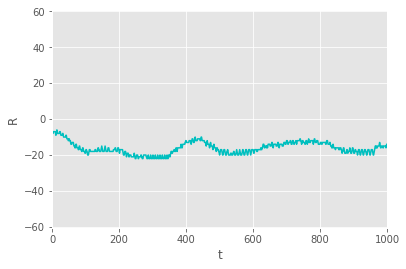

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')


plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])


plt.plot(moving_average(r0s, smooth), 'c')
plt.plot(moving_average(r1s, smooth))
plt.xlabel('t');
plt.ylabel('R');

plt.savefig('img/4A_' + mode + '.png')

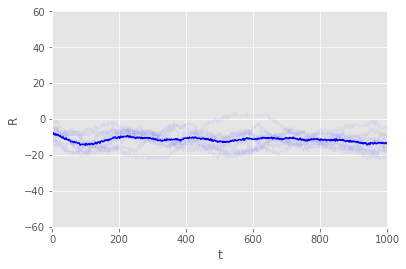

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=1)

plt.xlabel('t');
plt.ylabel('R');


plt.savefig('img/4A_' + mode + '.png')

For the neutral case (N=100):

In [43]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

7.673836163836164

For the friend case (N=100):

In [53]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

44.89634365634366